## まとめ

機械学習を行うまでのデータの取得、前処理、可視化、加工までを行います。

Q.1.1  
★　./data/stock_8308.tsvを読み込め。

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
data = pd.read_csv("./data/stock_8308.tsv", sep="\t")
data.head()

,date,session,open,high,low,close,volume,value
0,2007-01-04,0,323000.0,325000.0,321000.0,325000.0,28930,9331985000
1,2007-01-04,1,NaN,NaN,NaN,NaN,0,0
2,2007-01-05,0,324000.0,326000.0,321000.0,321000.0,33418,10823882000
3,2007-01-05,1,321000.0,323000.0,320000.0,321000.0,22827,7342975000
4,2007-01-09,0,320000.0,330000.0,320000.0,329000.0,29230,9509112000


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5192 entries, 0 to 5191
Data columns (total 8 columns):
date       5192 non-null object
session    5192 non-null int64
open       5179 non-null float64
high       5179 non-null float64
low        5179 non-null float64
close      5179 non-null float64
volume     5192 non-null int64
value      5192 non-null int64
dtypes: float64(4), int64(3), object(1)
memory usage: 324.6+ KB


Q.2.1    
★session=0とsession=1に絞った別のデータフレームをそれぞれ作成せよ。  

In [44]:
# 前場の切り出し
zenba = data[data["session"] == 0]
zenba.head()

,date,session,open,high,low,close,volume,value
0,2007-01-04,0,323000.0,325000.0,321000.0,325000.0,28930,9331985000
2,2007-01-05,0,324000.0,326000.0,321000.0,321000.0,33418,10823882000
4,2007-01-09,0,320000.0,330000.0,320000.0,329000.0,29230,9509112000
6,2007-01-10,0,332000.0,333000.0,327000.0,329000.0,32163,10618725000
8,2007-01-11,0,328000.0,331000.0,327000.0,329000.0,18594,6115344000


In [45]:
# 後場の切り出し
goba = data[data["session"] == 1]
goba.head()

,date,session,open,high,low,close,volume,value
1,2007-01-04,1,NaN,NaN,NaN,NaN,0,0
3,2007-01-05,1,321000.0,323000.0,320000.0,321000.0,22827,7342975000
5,2007-01-09,1,329000.0,333000.0,327000.0,330000.0,31357,10375287000
7,2007-01-10,1,328000.0,330000.0,326000.0,328000.0,20511,6729752000
9,2007-01-11,1,329000.0,330000.0,325000.0,326000.0,16628,5437101000


Q.2.2    
★　Q2.1で作ったそれぞれのデータフレームの列名を被らないように変更せよ。（ただし、結合キーとしてdate列の名前は変更しない。）

In [46]:
# 結合のための前処理（前場）
del zenba["session"]
print(zenba.columns)
print()

rename_dict = {}
for col in zenba.columns[1:]:
    rename_dict[col] = col + "_zenba"
print(rename_dict)

zenba = zenba.rename(columns=rename_dict)
zenba.head()

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'value'], dtype='object')

{'open': 'open_zenba', 'high': 'high_zenba', 'low': 'low_zenba', 'close': 'close_zenba', 'volume': 'volume_zenba', 'value': 'value_zenba'}


,date,open_zenba,high_zenba,low_zenba,close_zenba,volume_zenba,value_zenba
0,2007-01-04,323000.0,325000.0,321000.0,325000.0,28930,9331985000
2,2007-01-05,324000.0,326000.0,321000.0,321000.0,33418,10823882000
4,2007-01-09,320000.0,330000.0,320000.0,329000.0,29230,9509112000
6,2007-01-10,332000.0,333000.0,327000.0,329000.0,32163,10618725000
8,2007-01-11,328000.0,331000.0,327000.0,329000.0,18594,6115344000


In [47]:
# 結合のための前処理（後場）　ディクト内包表記を利用
del goba["session"]
print(goba.columns)
print()

rename_dict = {col:col+"_goba" for col in goba.columns[1:]}
print(rename_dict)

goba = goba.rename(columns=rename_dict)
goba.head()

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'value'], dtype='object')

{'open': 'open_goba', 'high': 'high_goba', 'low': 'low_goba', 'close': 'close_goba', 'volume': 'volume_goba', 'value': 'value_goba'}


,date,open_goba,high_goba,low_goba,close_goba,volume_goba,value_goba
1,2007-01-04,NaN,NaN,NaN,NaN,0,0
3,2007-01-05,321000.0,323000.0,320000.0,321000.0,22827,7342975000
5,2007-01-09,329000.0,333000.0,327000.0,330000.0,31357,10375287000
7,2007-01-10,328000.0,330000.0,326000.0,328000.0,20511,6729752000
9,2007-01-11,329000.0,330000.0,325000.0,326000.0,16628,5437101000


Q.2.3    
★ Q2.2で作ったそれぞれのデータフレームをdate列をキーとして結合せよ。

In [48]:
# 結合
df = zenba.merge(goba, on="date")
df.head()

,date,open_zenba,high_zenba,low_zenba,close_zenba,volume_zenba,value_zenba,open_goba,high_goba,low_goba,close_goba,volume_goba,value_goba
0,2007-01-04,323000.0,325000.0,321000.0,325000.0,28930,9331985000,NaN,NaN,NaN,NaN,0,0
1,2007-01-05,324000.0,326000.0,321000.0,321000.0,33418,10823882000,321000.0,323000.0,320000.0,321000.0,22827,7342975000
2,2007-01-09,320000.0,330000.0,320000.0,329000.0,29230,9509112000,329000.0,333000.0,327000.0,330000.0,31357,10375287000
3,2007-01-10,332000.0,333000.0,327000.0,329000.0,32163,10618725000,328000.0,330000.0,326000.0,328000.0,20511,6729752000
4,2007-01-11,328000.0,331000.0,327000.0,329000.0,18594,6115344000,329000.0,330000.0,325000.0,326000.0,16628,5437101000


Q.2.4    
★ Q2.3で作ったデータフレームの欠損を確認した上、除去せよ。

In [49]:
# 欠損データの確認
df[df.isnull().any(axis=1)]

,date,open_zenba,high_zenba,low_zenba,close_zenba,volume_zenba,value_zenba,open_goba,high_goba,low_goba,close_goba,volume_goba,value_goba
0,2007-01-04,323000.0,325000.0,321000.0,325000.0,28930,9331985000,NaN,NaN,NaN,NaN,0,0
244,2007-12-28,200000.0,201000.0,198000.0,201000.0,23971,4774479000,NaN,NaN,NaN,NaN,0,0
245,2008-01-04,191000.0,194000.0,188000.0,189000.0,28857,5496481000,NaN,NaN,NaN,NaN,0,0
414,2008-09-08,NaN,NaN,NaN,NaN,0,0,103700.0,103700.0,103700.0,103700.0,13819,1433030300
486,2008-12-25,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0
487,2008-12-26,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0
488,2008-12-29,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0
489,2008-12-30,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0
490,2009-01-05,1450.0,1453.0,1420.0,1440.0,1683100,2416265500,NaN,NaN,NaN,NaN,0,0


In [50]:
# 欠損データの除去
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(2596, 13)
(2587, 13)


Q.2.5    
★ Q2.4で作ったデータフレームに以下の列を追加せよ。  
open : session=0のopen  
high : session=0とsession=1のhighの大きい方  
low : session=0とsession=1のlowの小さい方  
close : session=1のclose   
volume: session=0とsession=1のvolumeの合計  
value: session=0とsession=1のvalueの合計  

In [51]:
# １日ごとのデータを作成
df["open"] = df["open_zenba"]
df["high"] = df[["high_zenba", "high_goba"]].max(axis=1)
df["low"] = df[["low_zenba", "low_goba"]].min(axis=1)
df["close"] = df["close_goba"]
df["volume"] = df[["volume_zenba","volume_goba"]].sum(axis=1)
df["value"] = df["value_zenba"] + df["value_goba"] # こちらの方が直感的かも
df.head()

,date,open_zenba,high_zenba,low_zenba,close_zenba,volume_zenba,value_zenba,open_goba,high_goba,low_goba,close_goba,volume_goba,value_goba,open,high,low,close,volume,value
1,2007-01-05,324000.0,326000.0,321000.0,321000.0,33418,10823882000,321000.0,323000.0,320000.0,321000.0,22827,7342975000,324000.0,326000.0,320000.0,321000.0,56245,18166857000
2,2007-01-09,320000.0,330000.0,320000.0,329000.0,29230,9509112000,329000.0,333000.0,327000.0,330000.0,31357,10375287000,320000.0,333000.0,320000.0,330000.0,60587,19884399000
3,2007-01-10,332000.0,333000.0,327000.0,329000.0,32163,10618725000,328000.0,330000.0,326000.0,328000.0,20511,6729752000,332000.0,333000.0,326000.0,328000.0,52674,17348477000
4,2007-01-11,328000.0,331000.0,327000.0,329000.0,18594,6115344000,329000.0,330000.0,325000.0,326000.0,16628,5437101000,328000.0,331000.0,325000.0,326000.0,35222,11552445000
5,2007-01-12,329000.0,333000.0,326000.0,333000.0,28267,9323886000,332000.0,336000.0,331000.0,334000.0,49509,16530550000,329000.0,336000.0,326000.0,334000.0,77776,25854436000


Q.2.6  
★ Q2.5で作ったデータフレームの列を削除して以下の列のみに絞れ。   
date,open,high,low,close,volume,value

In [52]:
# 適切な列のみ抽出
valid_col = [col for col in df.columns if "zenba" not in col and  "goba" not in col]
print(valid_col)

df = df[valid_col]
df.head()

['date', 'open', 'high', 'low', 'close', 'volume', 'value']


,date,open,high,low,close,volume,value
1,2007-01-05,324000.0,326000.0,320000.0,321000.0,56245,18166857000
2,2007-01-09,320000.0,333000.0,320000.0,330000.0,60587,19884399000
3,2007-01-10,332000.0,333000.0,326000.0,328000.0,52674,17348477000
4,2007-01-11,328000.0,331000.0,325000.0,326000.0,35222,11552445000
5,2007-01-12,329000.0,336000.0,326000.0,334000.0,77776,25854436000


Q.3.1  
★ Q2.6で作ったデータフレームのclose列を折れ線グラフで表示せよ。  

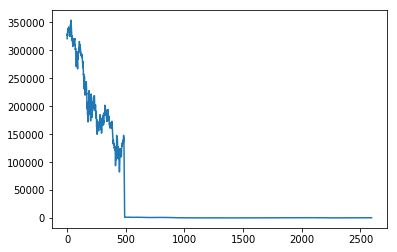

In [53]:
# データを可視化する
plt.plot(df["close"])
plt.show()

Q.3.2  
★ Q3.1で作ったデータフレームのcloseが大きすぎる区間を除外した新しいデータフレームを作成し、折れ線グラフで表示せよ。

(2587, 7)
(2105, 7)


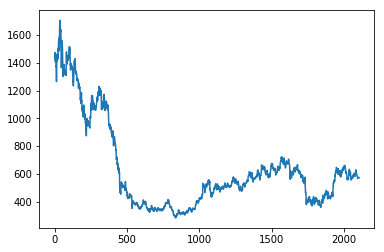

In [54]:
# closeの値が高すぎる期間を除去する
print(df.shape)
df = df[df["close"] < 50000]
df = df.reset_index(drop=True)
print(df.shape)

plt.plot(df["close"])
plt.show()

Q.4.1  
★ Q3.2で作ったデータフレームにy列を作成し、１つ前の行のclose列がopen列より大きい場合に1、それ以外の場合に0を入力せよ。  
また、先頭行は値を埋められないため、除去せよ。

In [55]:
df.head()

,date,open,high,low,close,volume,value
0,2009-01-06,1450.0,1454.0,1436.0,1444.0,3377400,4888187300
1,2009-01-07,1454.0,1482.0,1451.0,1475.0,3653000,5359326000
2,2009-01-08,1459.0,1482.0,1455.0,1471.0,3269100,4805717900
3,2009-01-09,1471.0,1486.0,1460.0,1461.0,4637100,6825123700
4,2009-01-13,1441.0,1442.0,1417.0,1420.0,3908100,5573985800


In [65]:
print((df["close"] - df["open"]).head())
print()
print((df["close"] - df["open"] > 0).astype(int).head())

y = list((df["close"] - df["open"] > 0).astype(int))

y =  y[1:] + [np.nan]

0    -6.0
1    21.0
2    12.0
3   -10.0
4   -21.0
dtype: float64

0    0
1    1
2    1
3    0
4    0
dtype: int32


In [75]:
y[2104:2105]

[nan]

In [67]:
[np.nan]

[nan]

In [63]:
len(y[1:])

2104

In [64]:
len(y[1:]+[np.nan])

2105

In [15]:
print((df["close"] - df["open"]).head())
print()
print((df["close"] - df["open"] > 0).astype(int).head())

y = list((df["close"] - df["open"] > 0).astype(int))
y =  y[1:] + [np.nan]

df["y"] = y
df.tail()

0    -6.0
1    21.0
2    12.0
3   -10.0
4   -21.0
dtype: float64

0    0
1    1
2    1
3    0
4    0
dtype: int32


,date,open,high,low,close,volume,value,y
2100,2017-07-31,568.0,574.6,566.5,568.4,15107800,8613256740,1.0
2101,2017-08-01,571.3,577.5,568.4,574.3,14936500,8552405910,0.0
2102,2017-08-02,578.4,579.6,569.1,573.8,10136000,5812332060,1.0
2103,2017-08-03,574.0,574.8,567.2,574.3,9567600,5468152880,0.0
2104,2017-08-04,573.0,574.8,570.4,572.8,8018300,4591509180,NaN


In [16]:
print(df.shape)
df = df.dropna()
print(df.shape)
df.head()

(2105, 8)
(2104, 8)


,date,open,high,low,close,volume,value,y
0,2009-01-06,1450.0,1454.0,1436.0,1444.0,3377400,4888187300,1.0
1,2009-01-07,1454.0,1482.0,1451.0,1475.0,3653000,5359326000,1.0
2,2009-01-08,1459.0,1482.0,1455.0,1471.0,3269100,4805717900,0.0
3,2009-01-09,1471.0,1486.0,1460.0,1461.0,4637100,6825123700,0.0
4,2009-01-13,1441.0,1442.0,1417.0,1420.0,3908100,5573985800,1.0


Q.4.2  
★ Q4.1で作ったデータフレームを先頭8割の行と残り2割の行に分割し、さらに、y列とそれ以外の列に分割せよ。  
その際、４つデータフレームはnumpyのarray型に変更し、y列のarrayは1次元配列に変更せよ。  
また、４つの変数名はそれぞれ以下にせよ。   
・先頭８割、y列以外 : X_train  
・先頭８割、y列 : y_train  
・残り2割、y列以外 : X_test  
・残り2割、y列 : y_test

In [17]:
print(len(df))
threshold = int(len(df) * 0.8)
print(threshold)

2104
1683


In [18]:
X = df[["open", "high", "low", "close", "volume", "value"]]
Y = df[["y"]]

print(X.iloc[:threshold, :].values)
print()
print(Y.iloc[:threshold, :].values)
print()
print(Y.iloc[:threshold, :].values.flatten())
print()

X_train, y_train = X.iloc[:threshold, :].values, Y.iloc[:threshold, :].values.flatten()
X_test, y_test = X.iloc[threshold:, :].values, Y.iloc[threshold:, :].values.flatten()

print(X_train)
print()
print(y_train)

[[1.45000000e+03 1.45400000e+03 1.43600000e+03 1.44400000e+03
  3.37740000e+06 4.88818730e+09]
 [1.45400000e+03 1.48200000e+03 1.45100000e+03 1.47500000e+03
  3.65300000e+06 5.35932600e+09]
 [1.45900000e+03 1.48200000e+03 1.45500000e+03 1.47100000e+03
  3.26910000e+06 4.80571790e+09]
 ...
 [6.36500000e+02 6.40000000e+02 6.20300000e+02 6.26000000e+02
  2.87069000e+07 1.80272533e+10]
 [6.16100000e+02 6.28600000e+02 6.14000000e+02 6.25300000e+02
  1.76853000e+07 1.10023602e+10]
 [6.13800000e+02 6.24600000e+02 6.11300000e+02 6.18400000e+02
  8.03010000e+06 4.96692795e+09]]

[[1.]
 [1.]
 [0.]
 ...
 [1.]
 [1.]
 [0.]]

[1. 1. 0. ... 1. 1. 0.]

[[1.45000000e+03 1.45400000e+03 1.43600000e+03 1.44400000e+03
  3.37740000e+06 4.88818730e+09]
 [1.45400000e+03 1.48200000e+03 1.45100000e+03 1.47500000e+03
  3.65300000e+06 5.35932600e+09]
 [1.45900000e+03 1.48200000e+03 1.45500000e+03 1.47100000e+03
  3.26910000e+06 4.80571790e+09]
 ...
 [6.36500000e+02 6.40000000e+02 6.20300000e+02 6.26000000e+02
  2